# Diagnostic Accuracy of Lateral Femoral Condyle Impaction Fracture (LFC-IF) 
# in predicting grade III ACL tears (using ML in Python)

Example to see if Data Science Machine Learning can be applied to Medical Research.

Accuracy score =  0.84
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0.84      0.83        25



<Figure size 600x600 with 0 Axes>

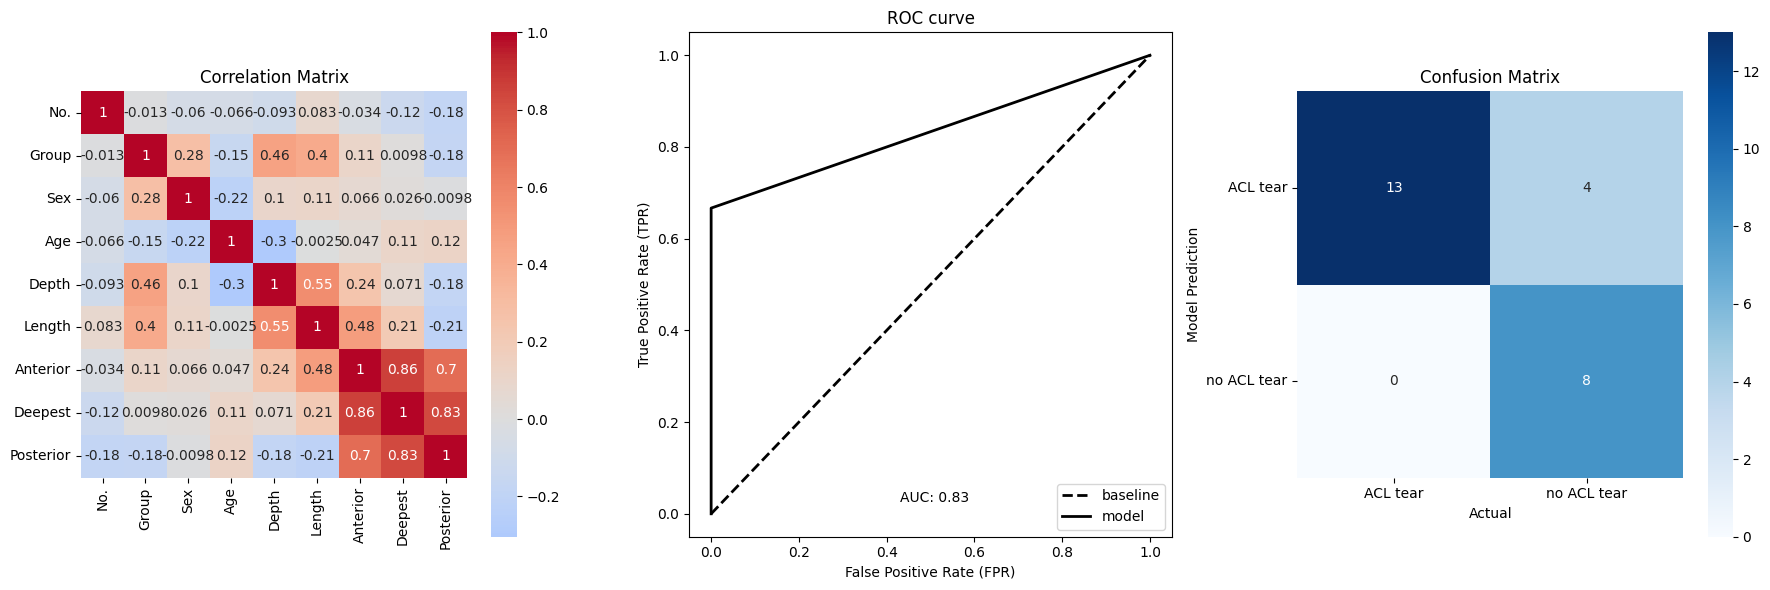

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix


# Step 1: Exploratory Data Analysis (EDA) - Find the best co-variates for predicting ACL tears after MRI.

df = pd.read_csv('data/lfc_if.csv', sep = '\t').dropna()
df['Sex'] = np.where(df.Sex == 'M', 1, 0)

fig = plt.figure(figsize = (6, 6))

heatmap = sns.heatmap(
    df.corr(),
    center = 0,
    square = True,
    annot = True,
    cmap = 'coolwarm',
    ax = axes[0]
)

# Step 2: Classification - Define Inputs (X) and Outputs (y)

X = df[['Depth', 'Length', 'Posterior']]
y = df.Group # 1 is ACL tear confirmed, 0 is no ACL tear confirmed


# Step 3: Create training and test data 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 0, stratify = y
)

# Step 4: Create pipeline for data scaling and logistic regression transformation.

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('lr', LogisticRegression(
        solver = 'lbfgs', random_state = 0))
]).fit(X_train, y_train)

# Step 5: Create a predictive model using training data and test the model using test data.

pred = pipe.predict(X_test)

# Step 6: Evaluate the results of predictive model (in this example, the accuracy of Sex, Age, and MRI measurements of impaction fracture (deep femoral notch) in diagnosing ACL tears)

acc = accuracy_score(y_test, pred)
print("Accuracy score = ", round(acc, 2))
print(classification_report(y_test, pred))

def plot_roc(y_test, pred, ax=None):
    if not ax:
        fig, ax = plt.subplots(1, 1)
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    ax.plot(
    [0, 1], [0, 1], color='black', lw=2,
    linestyle='--', label='baseline'
    )
    ax.plot(fpr, tpr, color='black', lw=2, label='model')
    ax.legend(loc='lower right')
    ax.set_title('ROC curve')
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.annotate(f'AUC: {auc(fpr, tpr):.2}', xy=(.43, .025))
    return ax

def confusion_matrix_plot(y_true, y_pred, class_labels, ax=None, title=None, **kwargs):
    mat = confusion_matrix(y_true, y_pred)
    axes = sns.heatmap(
        mat.T, square=True, annot=True, fmt='d',
        cbar=True, cmap=plt.cm.Blues, ax=ax, **kwargs
    )
    axes.set_xlabel('Actual')
    axes.set_ylabel('Model Prediction')
    tick_marks = np.arange(len(class_labels)) + 0.5
    axes.set_xticks(tick_marks)
    axes.set_xticklabels(class_labels)
    axes.set_yticks(tick_marks)
    axes.set_yticklabels(class_labels, rotation=0)
    axes.set_title(title or 'Confusion Matrix')
    return axes

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(
    df.corr(),
    center=0,
    square=True,
    annot=True,
    cmap='coolwarm',
    ax=axes[0]
)
axes[0].set_title('Correlation Matrix')
plot_roc(y_test, pred, ax=axes[1])
confusion_matrix_plot(y_test, pred, ['ACL tear', 'no ACL tear'], ax=axes[2])
plt.tight_layout()
plt.show()



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix

df = pd.read_csv('data/lfc_if.csv', sep = '\t').dropna()
df['Sex'] = np.where(df.Sex == 'M', 1, 0)

def dkim_machine_learning(df, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.25, random_state = 0, stratify = y
    )
    
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('lr', LogisticRegression(
            solver = 'lbfgs', random_state = 0))
    ]).fit(X_train, y_train)
    
    pred = pipe.predict(X_test)
    
    acc = round(accuracy_score(y_test, pred),3)
    
    def plot_roc(y_test, pred, ax=None):
        if not ax:
            fig, ax = plt.subplots(1, 1)
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        ax.plot(
        [0, 1], [0, 1], color='black', lw=2,
        linestyle='--', label='baseline'
        )
        ax.plot(fpr, tpr, color='black', lw=2, label='model')
        ax.legend(loc='lower right')
        ax.set_title('ROC curve')
        ax.set_xlabel('False Positive Rate (FPR)')
        ax.set_ylabel('True Positive Rate (TPR)')
        ax.annotate(f'AUC: {auc(fpr, tpr):.2}', xy=(.43, .025))
        return ax
    
    def confusion_matrix_plot(y_test, pred, class_labels, ax=None, title=None, **kwargs):
        mat = confusion_matrix(y_test, pred)
        axes = sns.heatmap(
            mat.T, square=True, annot=True, fmt='d',
            cbar=True, cmap=plt.cm.Blues, ax=ax, **kwargs
        )
        axes.set_xlabel('Actual')
        axes.set_ylabel('Model Prediction')
        tick_marks = np.arange(len(class_labels)) + 0.5
        axes.set_xticks(tick_marks)
        axes.set_xticklabels(class_labels)
        axes.set_yticks(tick_marks)
        axes.set_yticklabels(class_labels, rotation=0)
        axes.set_title(title or 'Confusion Matrix')
        return axes
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sns.heatmap(
        df.corr(),
        center=0,
        square=True,
        annot=True,
        cmap='coolwarm',
        ax=axes[0]
    )
    axes[0].set_title('Correlation Matrix')
    plot_roc(y_test, pred, ax=axes[1])
    confusion_matrix_plot(y_test, pred, ['ACL tear', 'no ACL tear'], ax=axes[2])
    plt.tight_layout()
    plt.show()
    print("Diagnostic accuracy = ", acc)
    return acc

Test of custom function `dkim_machine_learning()` to run Machine Learning in Python (first assignment):

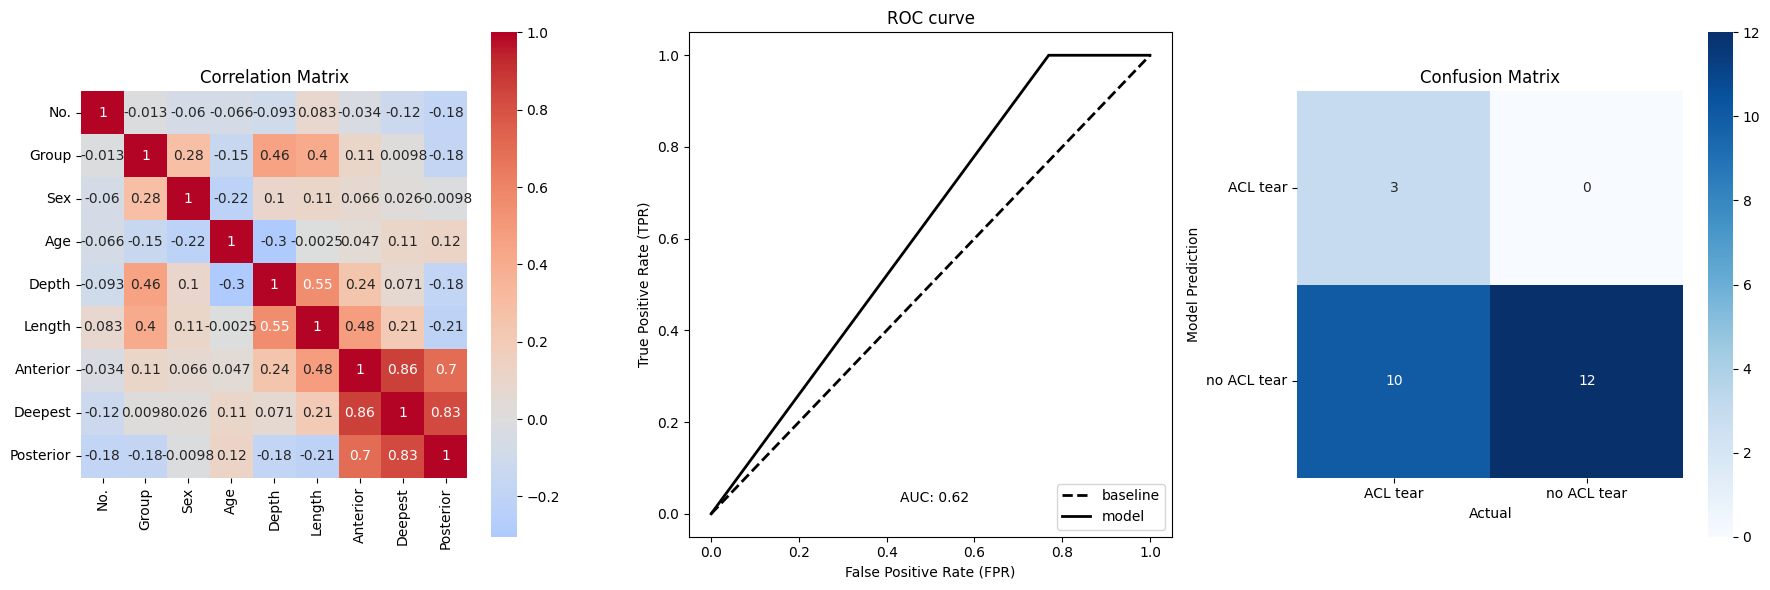

Diagnostic accuracy =  0.6


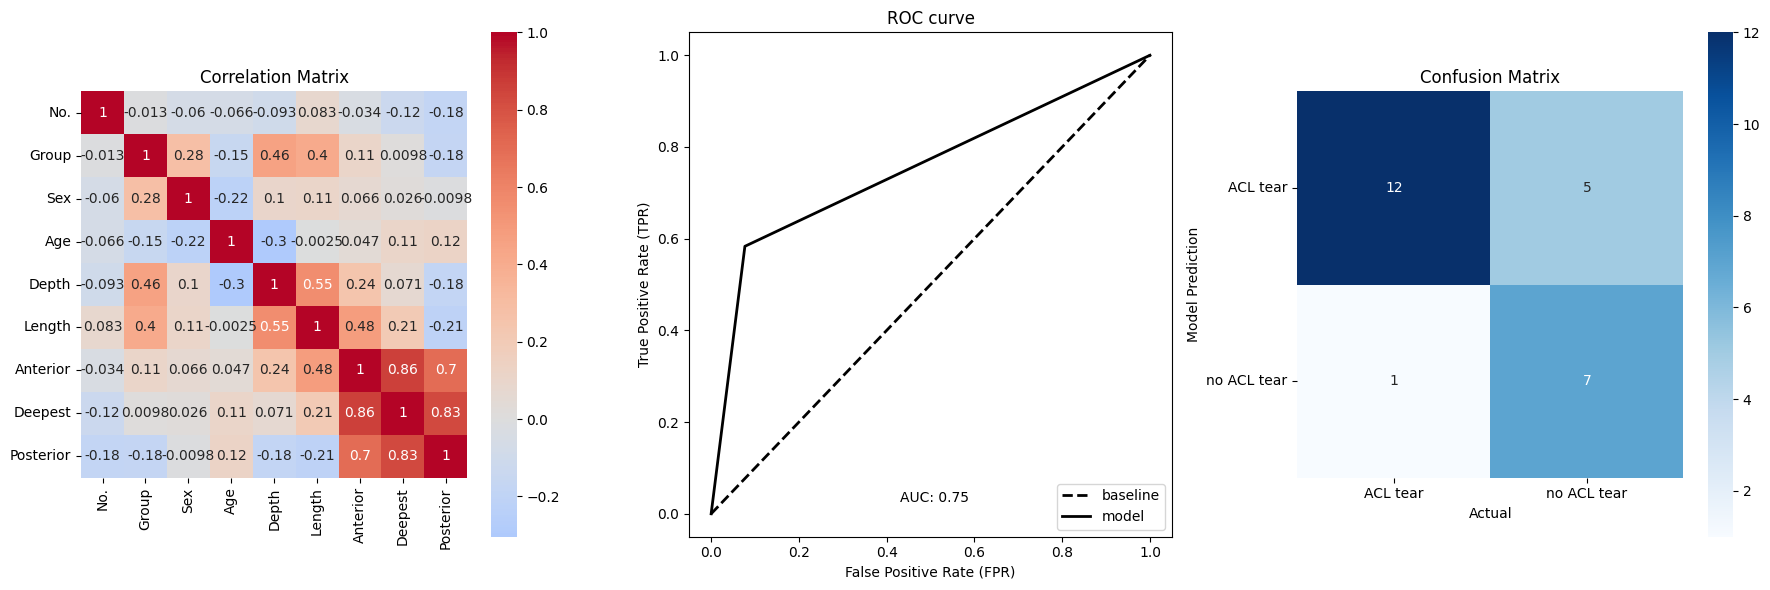

Diagnostic accuracy =  0.76


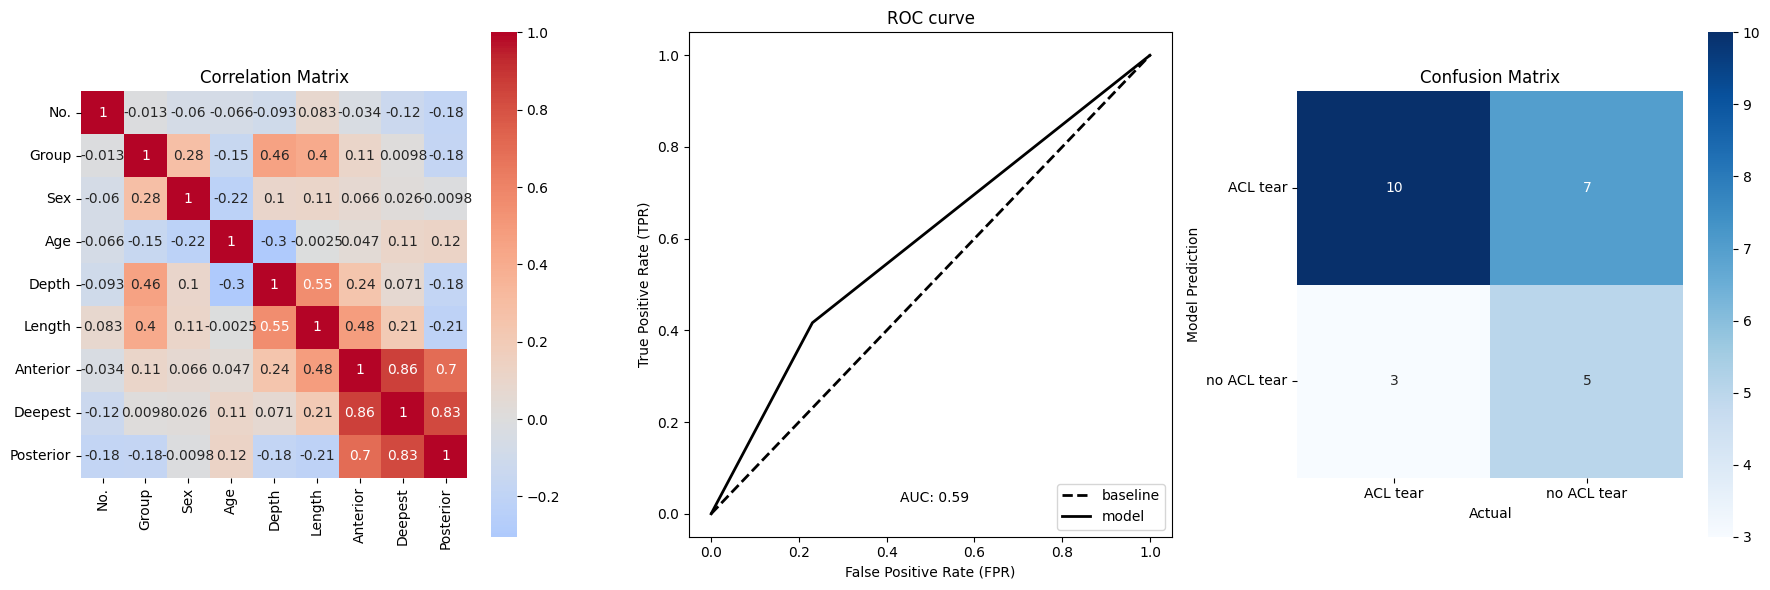

Diagnostic accuracy =  0.6


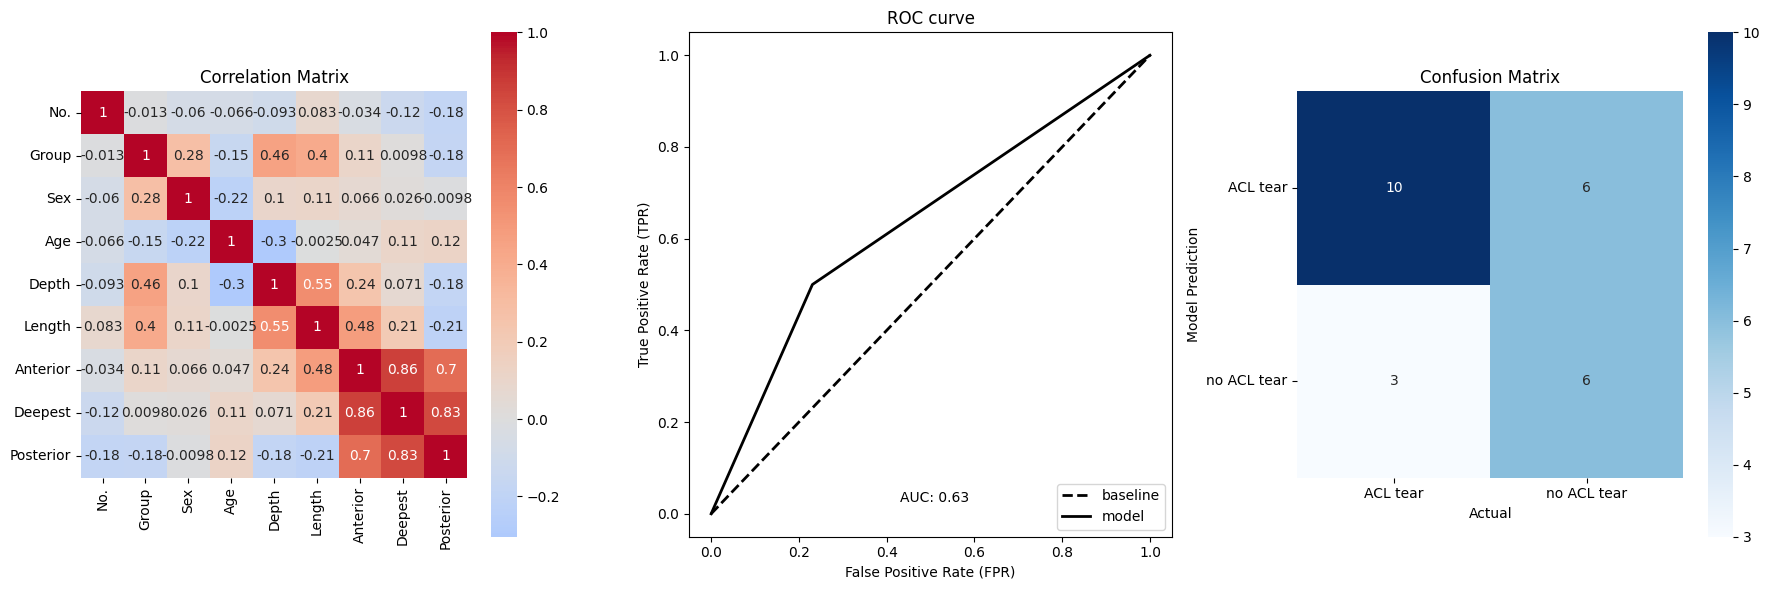

Diagnostic accuracy =  0.64


(Pipeline(steps=[('scale', StandardScaler()),
                 ('lr', LogisticRegression(random_state=0))]),
 0.64)

In [12]:
dkim_machine_learning(df, df[['Sex']], df.Group)
dkim_machine_learning(df, df[['Depth']], df.Group)
dkim_machine_learning(df, df[['Length']], df.Group)
dkim_machine_learning(df, df[['Posterior']], df.Group)